<a href="https://colab.research.google.com/github/swilsonmfc/DeepLearning/blob/master/MovieReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
* Data prepackaged with Keras
* IMDB Reviews
* Binary Classification
* Cross-Entropy Loss
* Two hidden dense layers with relu activation
* Final layer sigmoid activation
* Use train / validation plots to decide number of epochs
* Report test metrics on final model

In [0]:
import keras
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb

In [0]:
[train_data, train_label], [test_data, test_label] = imdb.load_data(num_words=10000)

# Examine Data

In [37]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Train & Test Sets

In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test  = vectorize_sequences(test_data)

y_train = np.array(train_label).astype('float32')
y_test  = np.array(test_label).astype('float32')

# Training & Validation Sets

In [0]:
X_val = X_train[:10000]
X_train_part = X_train[10000:]

y_val = y_train[:10000]
y_train_part = y_train[10000:]

# Define Model

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile & Fit Model

In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train_part,
                   y_train_part,
                   epochs=20,
                   batch_size=512,
                   validation_data=[X_val, y_val])


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 304us/step - loss: 0.5177 - binary_accuracy: 0.7749 - val_loss: 0.3777 - val_binary_accuracy: 0.8773
Epoch 2/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.3003 - binary_accuracy: 0.9019 - val_loss: 0.3003 - val_binary_accuracy: 0.8846
Epoch 3/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.2186 - binary_accuracy: 0.9277 - val_loss: 0.2814 - val_binary_accuracy: 0.8915
Epoch 4/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1708 - binary_accuracy: 0.9429 - val_loss: 0.2865 - val_binary_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1360 - binary_accuracy: 0.9563 - val_loss: 0.3417 - val_binary_accuracy: 0.8656
Epoch 6/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.1095 - binary_accuracy: 0.9669 - val_loss: 0.3117 - val_b

# Plot Training & Validation Loss

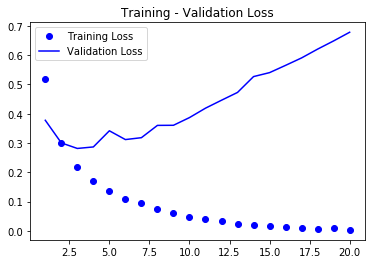

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b-', label='Validation Loss')
plt.title('Training - Validation Loss')
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.legend()
plt.show()


# Plot Training & Validation Accuracy

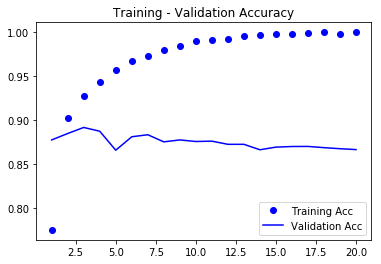

In [32]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b-', label='Validation Acc')
plt.title('Training - Validation Accuracy')
plt.xlabel=('Epochs')
plt.ylabel=('Accuracy')
plt.legend()
plt.show()

# Limit Overfitting & Test Set
Looks like around 4 epochs we begin to see error rate on validation begin to increase.  Let's refit the model to 4 epochs, use all the training data and look at error on our test set.

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

history = model.fit(X_train,
                   y_train,
                   epochs=4,
                   batch_size=512)

results = model.evaluate(X_test, y_test)
print('Loss {} Accuracy {}'.format(results[0], results[1]))

Epoch 1/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.4569 - binary_accuracy: 0.8210
Epoch 2/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.2608 - binary_accuracy: 0.9100
Epoch 3/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.2001 - binary_accuracy: 0.9284
Epoch 4/4
25000/25000 [==============================] - 4s 142us/step
Loss 0.31602700874328615 Accuracy 0.8746
